* This notebook was made to explore the surface currents of model response spatially and temporally by releasing particles within t=+-30min, l+-1km.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime as dt
import pytz, datetime
import scipy.io
import arrow
import os
from salishsea_tools import nc_tools, viz_tools, tidetools, stormtools, bathy_tools
from matplotlib import reload
from __future__ import division
from IPython.core.display import Image
import drifter

In [2]:
grid = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc','r')
bathy, X, Y = tidetools.get_bathy_data(grid)
lats = grid.variables['nav_lat']
lons = grid.variables['nav_lon']
bath = grid.variables['Bathymetry']

In [3]:
tracersT = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_10RFdailySmoo/\
SalishSea_1h_20141008_20141010_grid_T.nc')
ssh = tracersT.variables['sossheig']
timesteps = tracersT.variables['time_counter']

In [4]:
def plotoct_mewold(lon,lat,key,drifter = 'a'):
    fig, axs = plt.subplots(3, 3, figsize=(15, 12))
    for i in np.arange(3):
        for ax in axs[i,:]:
            viz_tools.plot_coastline(ax,grid,coords='map')
            viz_tools.plot_coastline(ax,grid,coords='map',isobath=4,color='FireBrick')
            viz_tools.plot_coastline(ax,grid,coords='map',isobath=20,color='OrangeRed')
            ax.set_xlim([-123.6,-123]); ax.set_ylim([48.8,49.4])
            ax.set_xticks([-123.6, -123.4, -123.2,-123])
            ax.set_xticklabels([-123.6, -123.4, -123.2,-123])
            ax.set_xlabel('Longitude'); ax.set_ylabel('Latitude')   
    colors=['g','DodgerBlue','tomato']; t = ['-30min','0','30min'];
    part = 0
    if drifter =='a':
        pa = part 
    else:
        pa = part + 27
    for i in np.arange(3):
        for j in np.arange(3):
            axs[i,j].scatter(lon[key][0,pa],lat[key][0,pa],color='0.30',marker='s')
            axs[i,j].scatter(lon[key][1:,pa],lat[key][1:,pa],marker='o',color=colors[0],label=t[0])
            axs[i,j].scatter(lon[key][0,pa+9],lat[key][0,pa+9],color='0.30',marker='s')
            axs[i,j].scatter(lon[key][1:,pa+9],lat[key][1:,pa+9],marker='o',color=colors[1],label=t[1])
            axs[i,j].scatter(lon[key][0,pa+18],lat[key][0,pa+18],color='0.30',marker='s')
            axs[i,j].scatter(lon[key][1:,pa+18],lat[key][1:,pa+18],marker='o',color=colors[2],label=t[2])
            axs[i,j].plot(-123-np.array([18.2,13.7,12])/60.,49+np.array([6.4,8,7.6])/60.,'-k',lw=2,color='Indigo')
            axs[i,j].legend(loc='best')
            pa = pa +1
    return fig

In [5]:
def plot_tide(hour,duration):
    fig, ax = plt.subplots(1,1,figsize = (6,6))
    ax.plot(timesteps[0:48],ssh[0:48,466,329],'-k')   
    ax.set_xticklabels([])
    ax.set_ylabel('Water level (m)')
    ax.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax.set_title('sossheig, ~Point Atkinson')        
    t=hour
    ax.plot([timesteps[t],timesteps[t]],[-2.0,1.5],'r-',label='start')  
    t2=hour+duration
    ax.plot([timesteps[t2],timesteps[t2]],[-2.0,1.5],'b-',label='end')
    return fig

In [6]:
drifters = scipy.io.loadmat('/ocean/mhalvers/research/drifters/SoG_drifters.mat',squeeze_me=True)
ubc = drifters['ubc']

# Drop112a

In [7]:
drop = 'drop1/12'
runs=['RFseries','reduvisseries','1e061e05series','jettyseries']
base='/ocean/jieliu/research/meopar/Ariane/result/'
file_pattern = 'ariane_trajectories_qualitative.nc'
lon112 = {}; lat112={}
for run in runs:
    path = os.path.join(base,run, drop,file_pattern)
    f = nc.Dataset(path,'r');
    lon112[run] = f.variables['traj_lon']
    lat112[run] = f.variables['traj_lat']

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


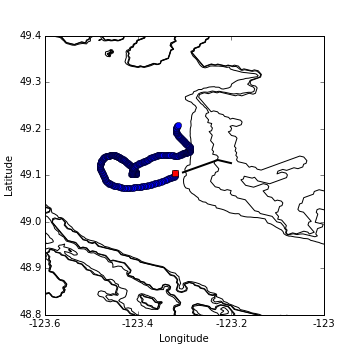

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


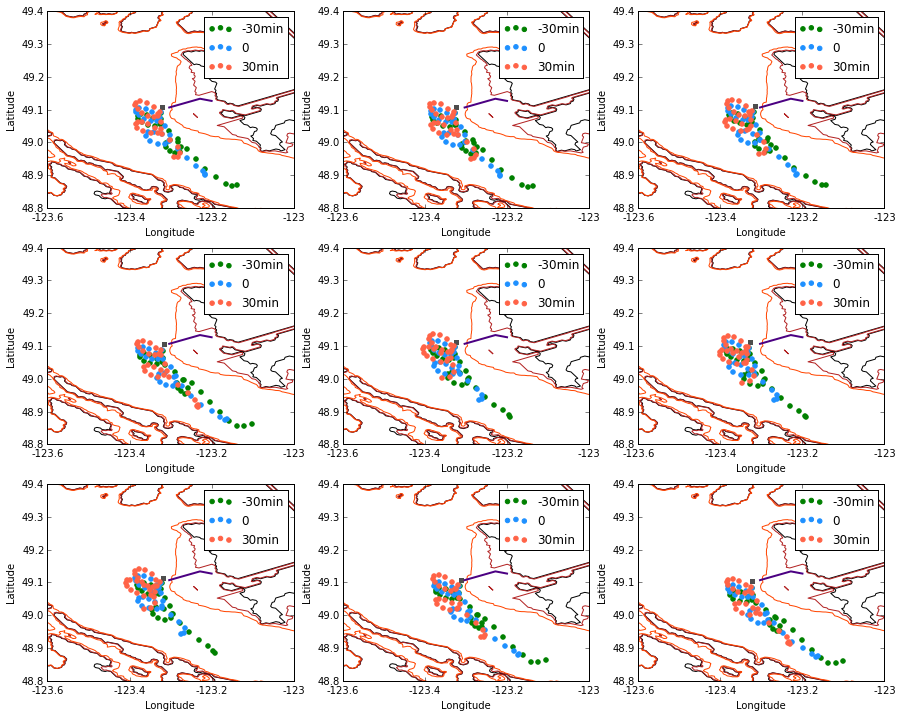

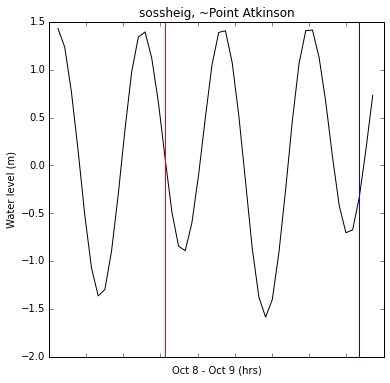

In [8]:
fig = plotoct_mewold(lon112,lat112,'RFseries',drifter='a')
fig = plot_tide(16,29)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop112a.png')

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


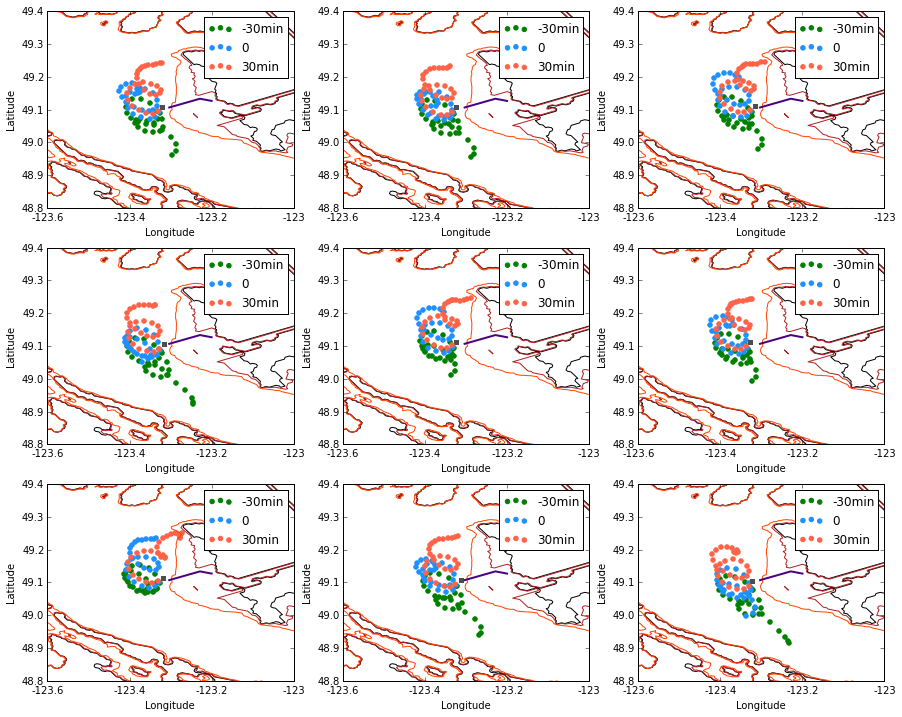

In [9]:
fig = plotoct_mewold(lon112,lat112,'reduvisseries',drifter='a')

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


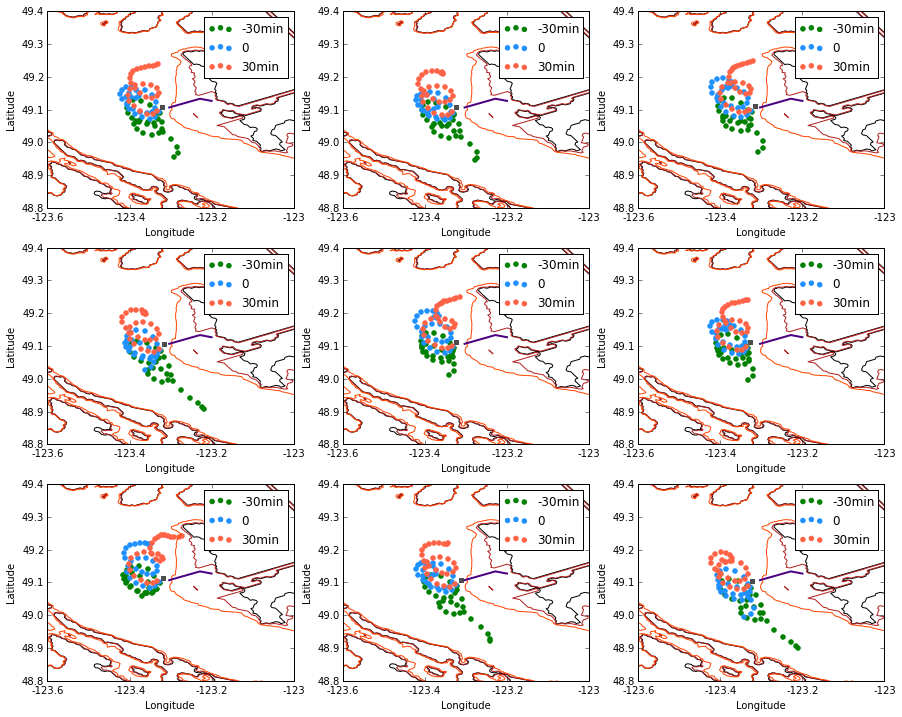

In [10]:
fig = plotoct_mewold(lon112,lat112,'1e061e05series',drifter='a')

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


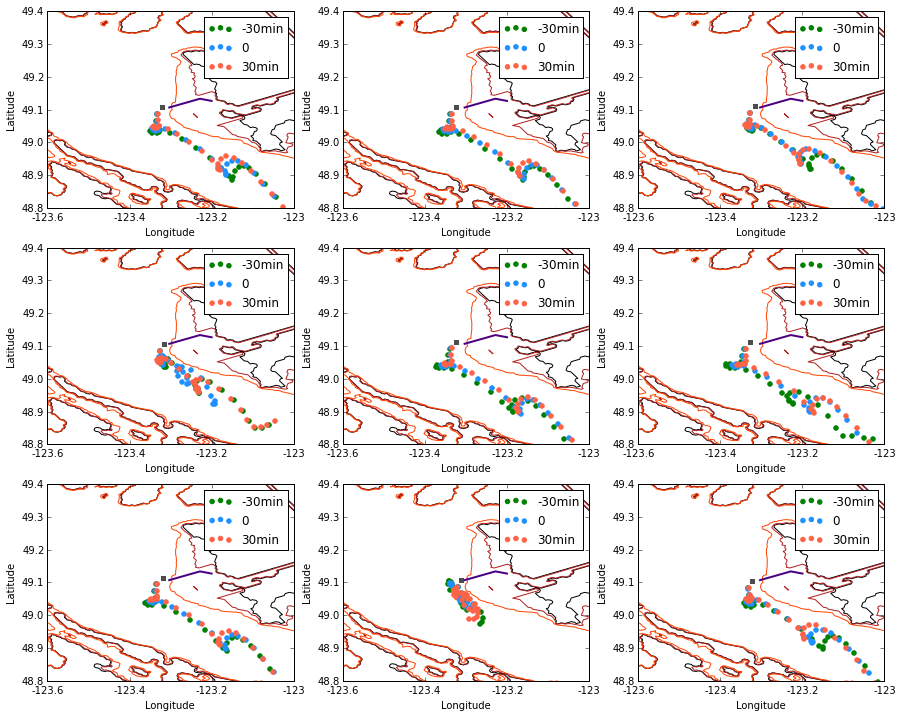

In [11]:
fig = plotoct_mewold(lon112,lat112,'jettyseries',drifter='a')

# Drop112b

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


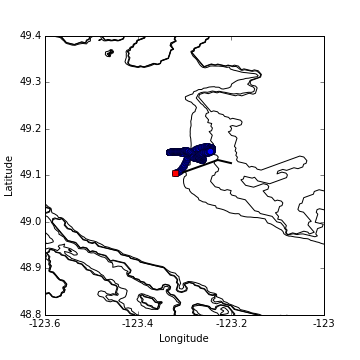

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


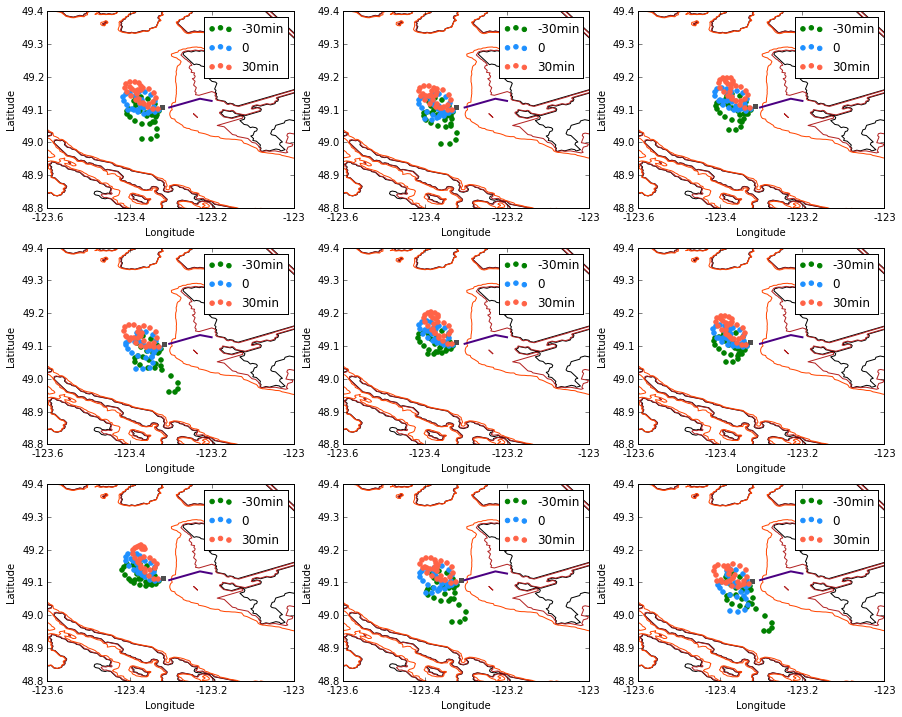

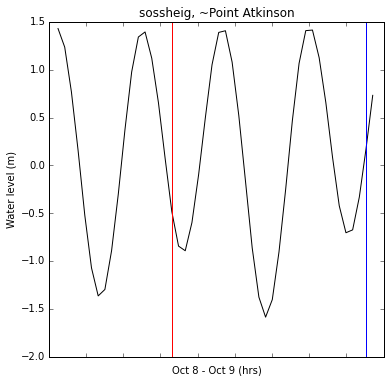

In [12]:
fig = plotoct_mewold(lon112,lat112,'RFseries',drifter='b')
fig = plot_tide(17,29)
Image(filename='/ocean/jieliu/research/meopar/surface current/drop112b.png')

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


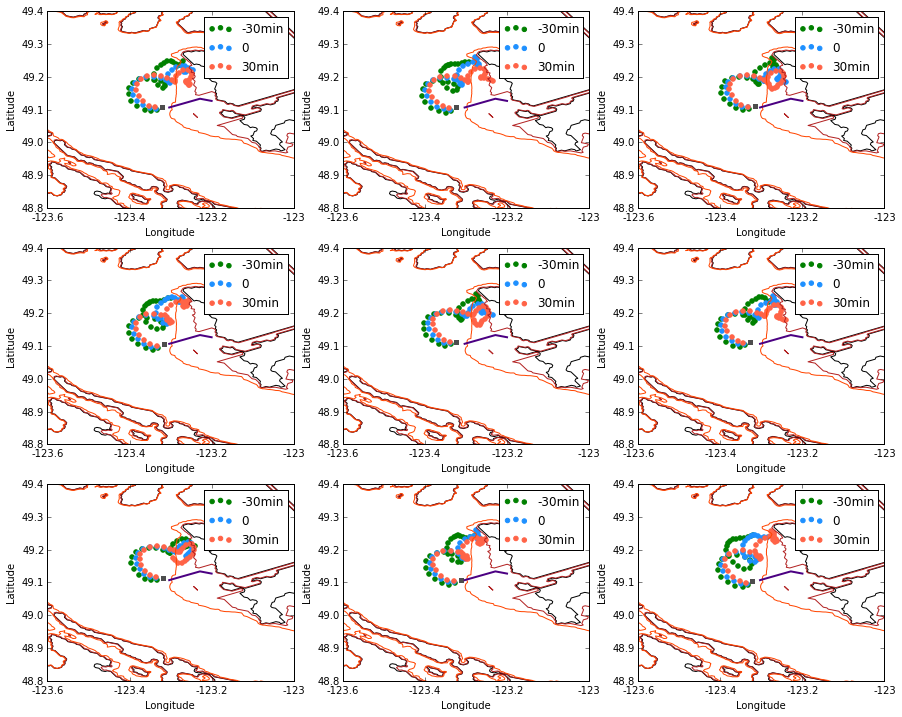

In [13]:
fig = plotoct_mewold(lon112,lat112,'reduvisseries',drifter='b')

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


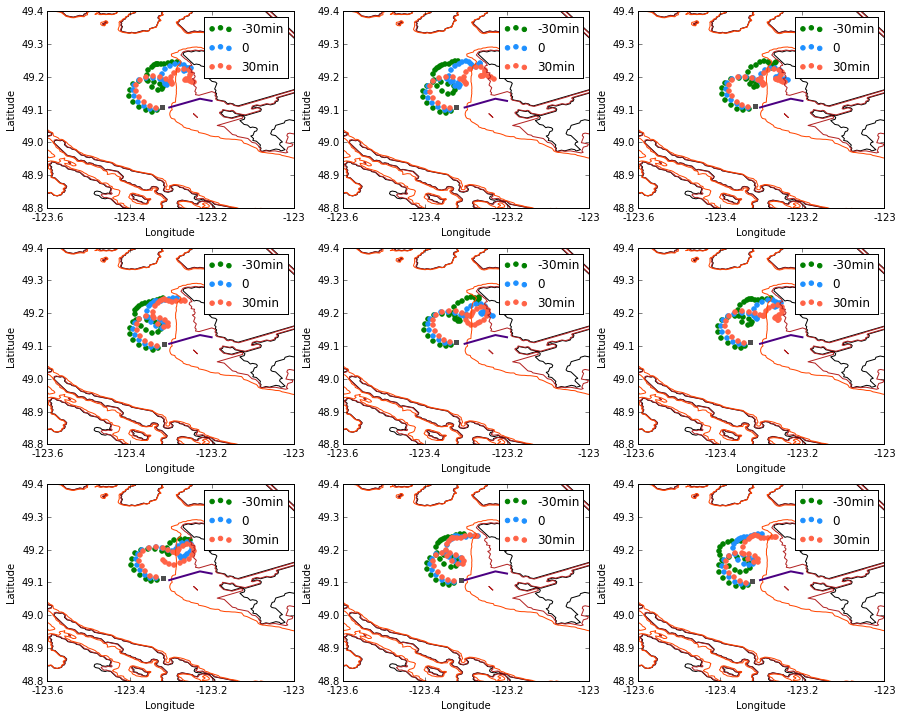

In [14]:
fig = plotoct_mewold(lon112,lat112,'1e061e05series',drifter='b')

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


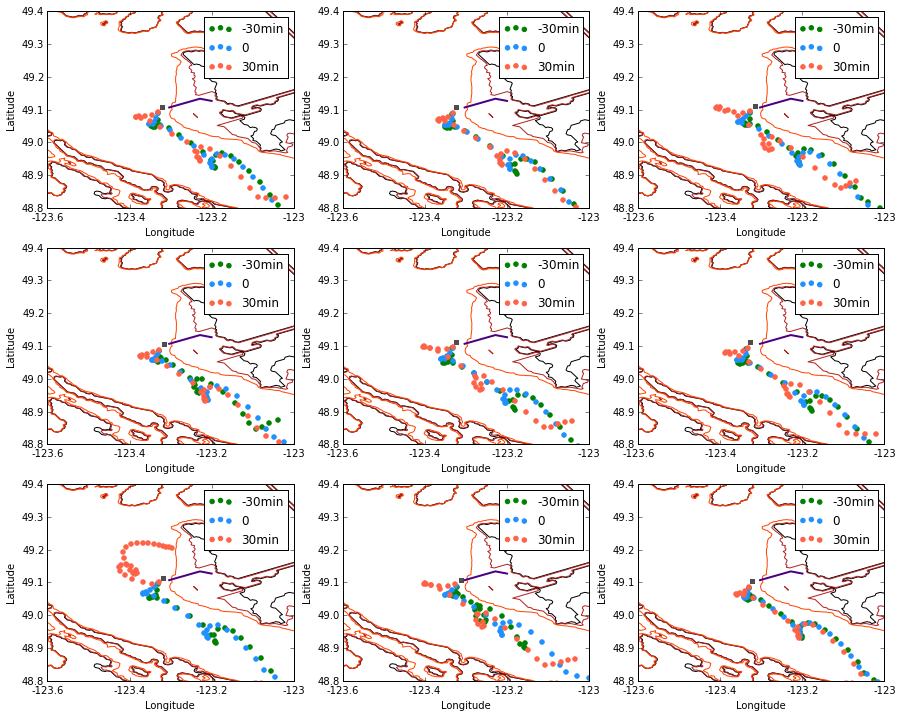

In [15]:
fig = plotoct_mewold(lon112,lat112,'jettyseries',drifter='b')